# Section one, cell clustering and visulization

In [1]:
# load all packages
require(Seurat) # single cell transcriptome analysis pipelin, ref: https://satijalab.org/seurat/
require(Yano) # for ReadPISA and alternative expression analysis, ref: https://github.com/shiquan/Yano
require(dplyr) # data pipeline %>%

Loading required package: Seurat

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode

Loading required package: Yano

Loading required package: Matrix

Loading required package: DT


Attaching package: ‘DT’


The following object is masked from ‘package:SeuratObject’:

    JS


The following object is masked from ‘package:Seurat’:

    JS


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# read gene count files, in MEX format
count <- ReadPISA("/course/bgi23/quan/exp/")

In [3]:
# Create a Seurat object
# Set min.features to 5000 to reduce memory usage
# obj <- CreateSeuratObject(count, min.features = 1000, min.cells = 10)
obj <- CreateSeuratObject(count, min.features = 5000, min.cells = 10)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [4]:
obj

An object of class Seurat 
22345 features across 1514 samples within 1 assay 
Active assay: RNA (22345 features, 0 variable features)
 2 layers present: counts, data

In [5]:
# Setup the mitochrondria gene expression ratio and red blood pollution
obj[["percent.mt"]] <- PercentageFeatureSet(obj, pattern = "^MT-")
obj[["percent.hg"]] <- PercentageFeatureSet(obj, pattern = "^HB[ABDEGQZ12]+$")

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of percent.hg.”


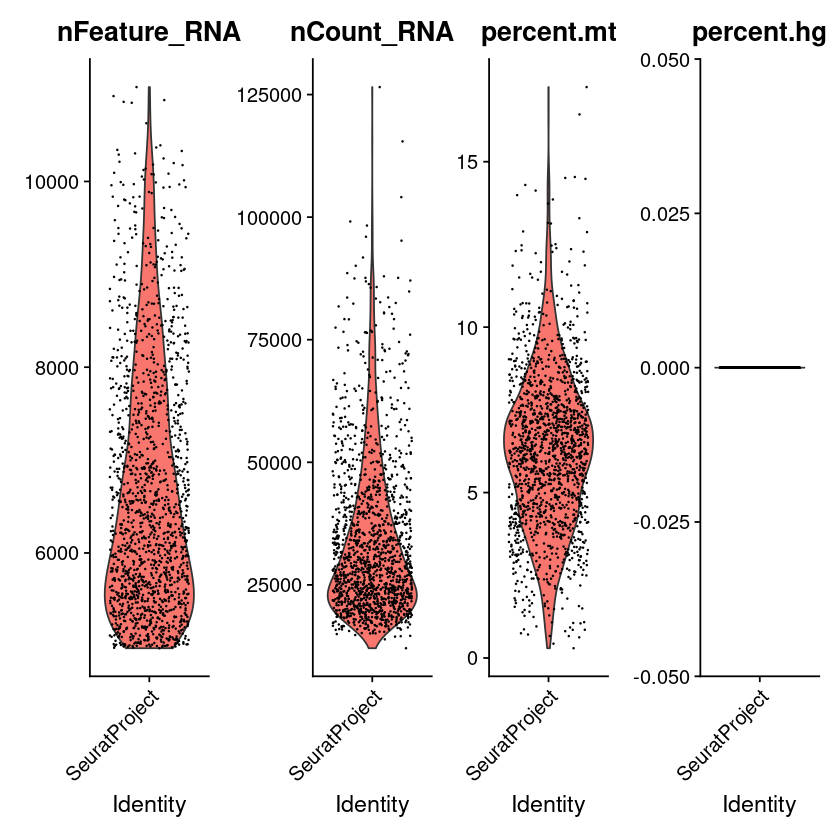

In [6]:
# Visulizate the features per cell
VlnPlot(obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt", "percent.hg"), ncol = 4)

In [10]:
# filter outliers
obj <- subset(obj, nFeature_RNA < 9000 & percent.mt < 20)
obj

An object of class Seurat 
22345 features across 1409 samples within 1 assay 
Active assay: RNA (22345 features, 2000 variable features)
 2 layers present: counts, data

In [11]:
# normalize (usually log scaled) the gene expression value to stablize the variance
# Comparsion of different normlize method. ref: Ahlmann-Eltze, C., Huber, W. Comparison of transformations for single-cell RNA-seq data. Nat Methods 20, 665–672 (2023). https://doi.org/10.1038/s41592-023-01814-1  

obj <- NormalizeData(obj)

In [12]:
# select the high variable expressed genes 
obj <- FindVariableFeatures(obj, selection.method = "vst", nfeatures = 2000)

In [13]:
# scaled the features for PCA analysis and clust cells by these features
obj <- ScaleData(obj, features = VariableFeatures(obj))
obj <- RunPCA(obj, features =  VariableFeatures(obj))

# Cluster cell groups
obj <- FindNeighbors(obj, dims = 1:10)
obj <- FindClusters(obj, resolution = 0.5)

Centering and scaling data matrix

PC_ 1 
Positive:  CYBA, SRGN, LAPTM5, TYROBP, FCER1G, AIF1, C1QC, C1QA, C1QB, TYMP 
	   MS4A7, RGS1, PLAUR, CCL3, BCL2A1, CD14, MS4A4A, VAMP8, STAB1, VSIG4 
	   CD163, ALOX5AP, MS4A6A, GPR183, ARHGDIB, METRNL, PLEK, TREM2, IFI30, FCGR3A 
Negative:  PTPRZ1, PTN, AQP4, HEPN1, CKB, FABP7, BCAN, AGT, S100B, TSC22D4 
	   MIR9-1HG, TTYH1, MAOB, ATP1B2, F3, FXYD6, LHFPL3, MDK, GSTT2B, FAM181B 
	   CRISPLD1, C1QL1, CHI3L1, MT3, MAPK8IP1, APLP1, CCND2, CRYAB, SERPINA3, ENSG00000273259 
PC_ 2 
Positive:  IGFBP7, ANXA1, SOD2, SPARCL1, C1S, SERPING1, CHI3L1, MGST1, IFITM3, TNC 
	   C3, TAGLN, CHI3L2, EFEMP1, CALD1, S100A6, ID3, CPE, TCIM, BST2 
	   EMILIN1, ID4, A2M, LTF, GLIPR1, VCAM1, SERPINA3, ENSG00000273259, RRAS, COPZ2 
Negative:  MAG, MOG, KLK6, ANLN, NKX6-2, ERMN, CNDP1, SPOCK3, RAPGEF5, HAPLN2 
	   CARNS1, MYRF, FGFR2, AIF1L, UGT8, PEX5L, TMEM151A, TF, ENPP2, PLPP2 
	   ST18, CNTNAP4, CLDN11, PCSK6, CAPN3, HCN2, ENSG00000258461, PLP1, EDIL3, FA2H 
PC_ 3 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1409
Number of edges: 40145

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8491
Number of communities: 8
Elapsed time: 0 seconds


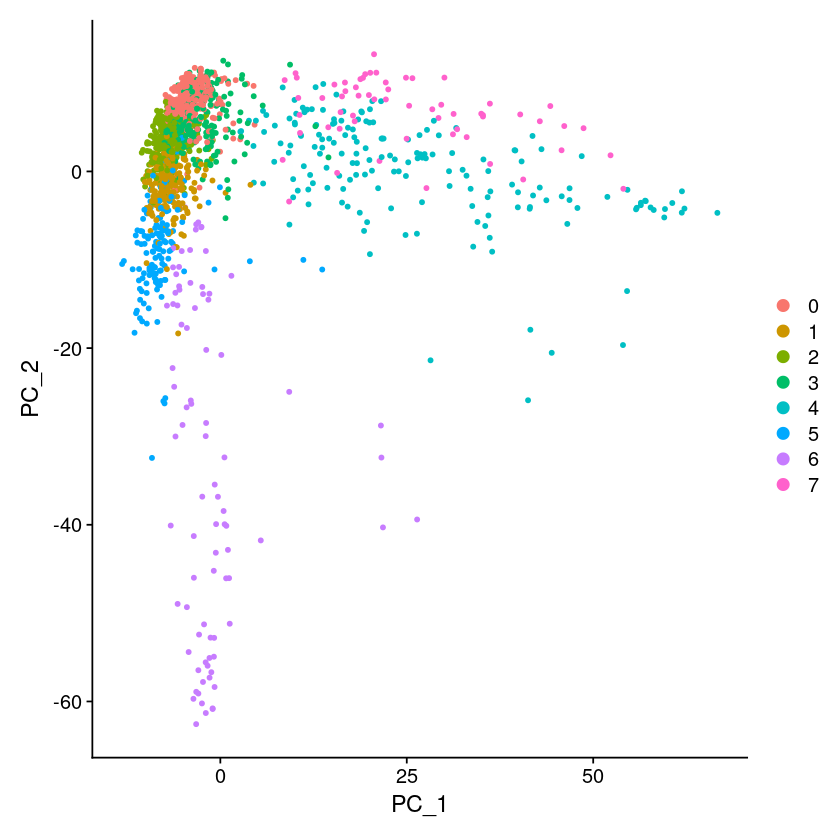

In [14]:
DimPlot(obj, reduction = "pca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
03:40:56 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

03:40:56 Read 1409 rows and found 10 numeric columns

03:40:56 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

03:40:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:40:57 Writing NN index file to t

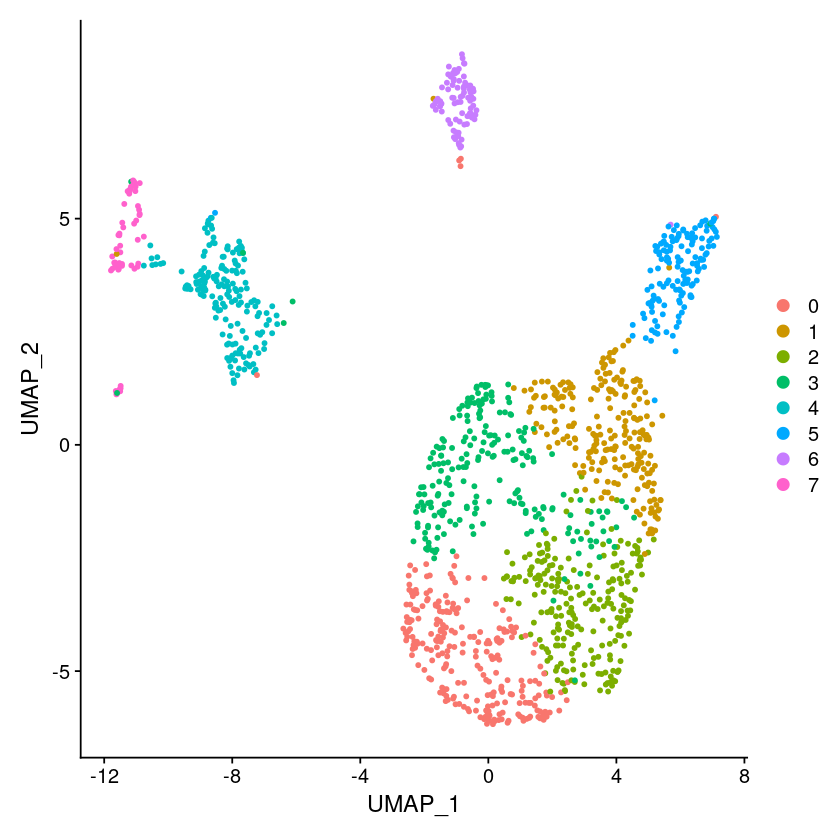

In [15]:
# Reduce feature space to 2D space
obj <- RunUMAP(obj, dims = 1:10)
DimPlot(obj, reduction = "umap")

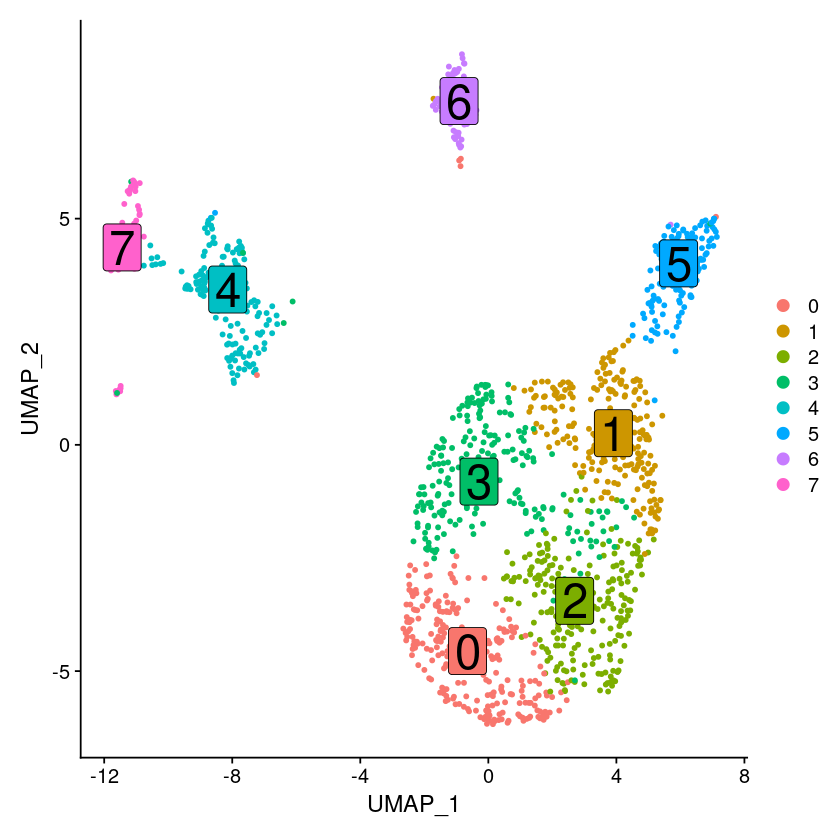

In [16]:
# label the clusters
DimPlot(obj, label=TRUE, label.size = 10, label.box = TRUE)

In [37]:
# find gene markers for each cell group 
markers <- FindAllMarkers(obj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [38]:
markers %>% group_by(cluster) %>% slice_max(n = 5, order_by = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
6.923671e-83,2.8580091,0.937,0.481,7.705423e-78,0,chr11:18269195-18269967/+/SAA1
7.807427e-82,2.8486164,0.933,0.494,8.688963e-77,0,chr11:18269717-18269977/+/SAA1
3.953178e-82,2.8478704,0.933,0.489,4.399531e-77,0,chr11:18269717-18269967/+/SAA1
8.782145e-84,2.7291859,0.925,0.439,9.773737e-79,0,chr11:18269717-18269962/+/SAA1
1.517112e-75,2.7193700,0.758,0.244,1.688409e-70,0,chr11:18245238-18245515/-/SAA2
5.009990e-52,0.9677134,0.996,0.892,5.575668e-47,1,chr6:122783717-122784074/+/FABP7
2.102107e-42,0.8822853,0.991,0.825,2.339456e-37,1,chr1:156404252-156404601/-/MIR9-1HG
5.778470e-42,0.8750157,0.991,0.823,6.430918e-37,1,chr1:156404256-156404601/-/MIR9-1HG
6.322767e-42,0.8698731,0.991,0.820,7.036671e-37,1,chr1:156404250-156404601/-/MIR9-1HG


In [20]:
# select top 1 gene marker for each cell group and put to `sel`
markers %>% group_by(cluster) %>% slice_max(n = 1, order_by = avg_log2FC) %>% pull(gene) %>% unique() -> sel

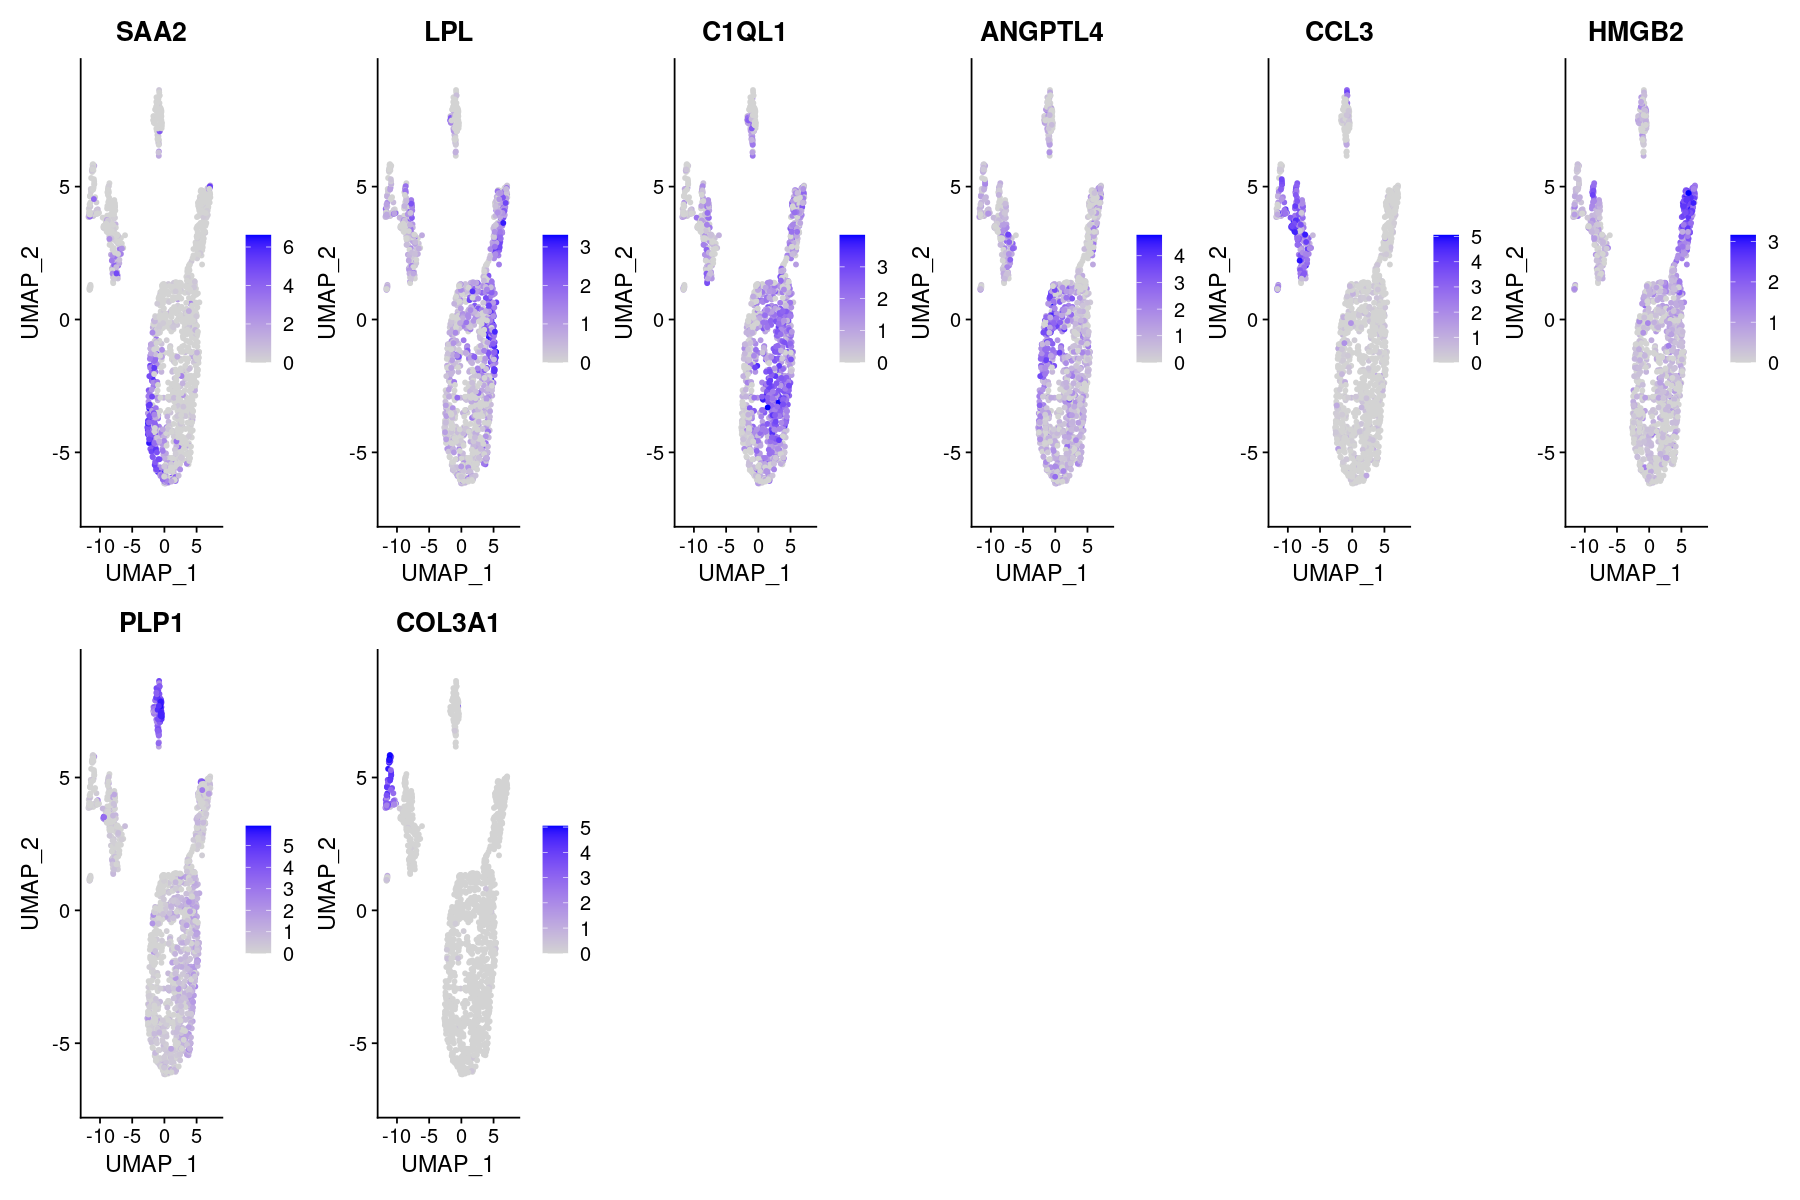

In [22]:
options(repr.plot.width=15, repr.plot.height=10) # change the size of figure
# plot expression level of marker genes on umap plot
FeaturePlot(obj, features = sel, ncol = 6) 

In [23]:
# merge gene expression for cells in the same cell group and generate a gene-group expression matrix.
DefaultAssay(obj) <- "RNA"
mat <- AggregateExpression(obj, assays = "RNA", slot="counts")
markers %>% group_by(cluster) %>% slice_max(n = 100, order_by = avg_log2FC) %>% pull(gene) %>% unique()->sel
mat <- mat$RNA[sel,]
dim(mat)

[1] 721   8

Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
“Some gene sets have size one. Consider setting 'min.sz > 1'.”


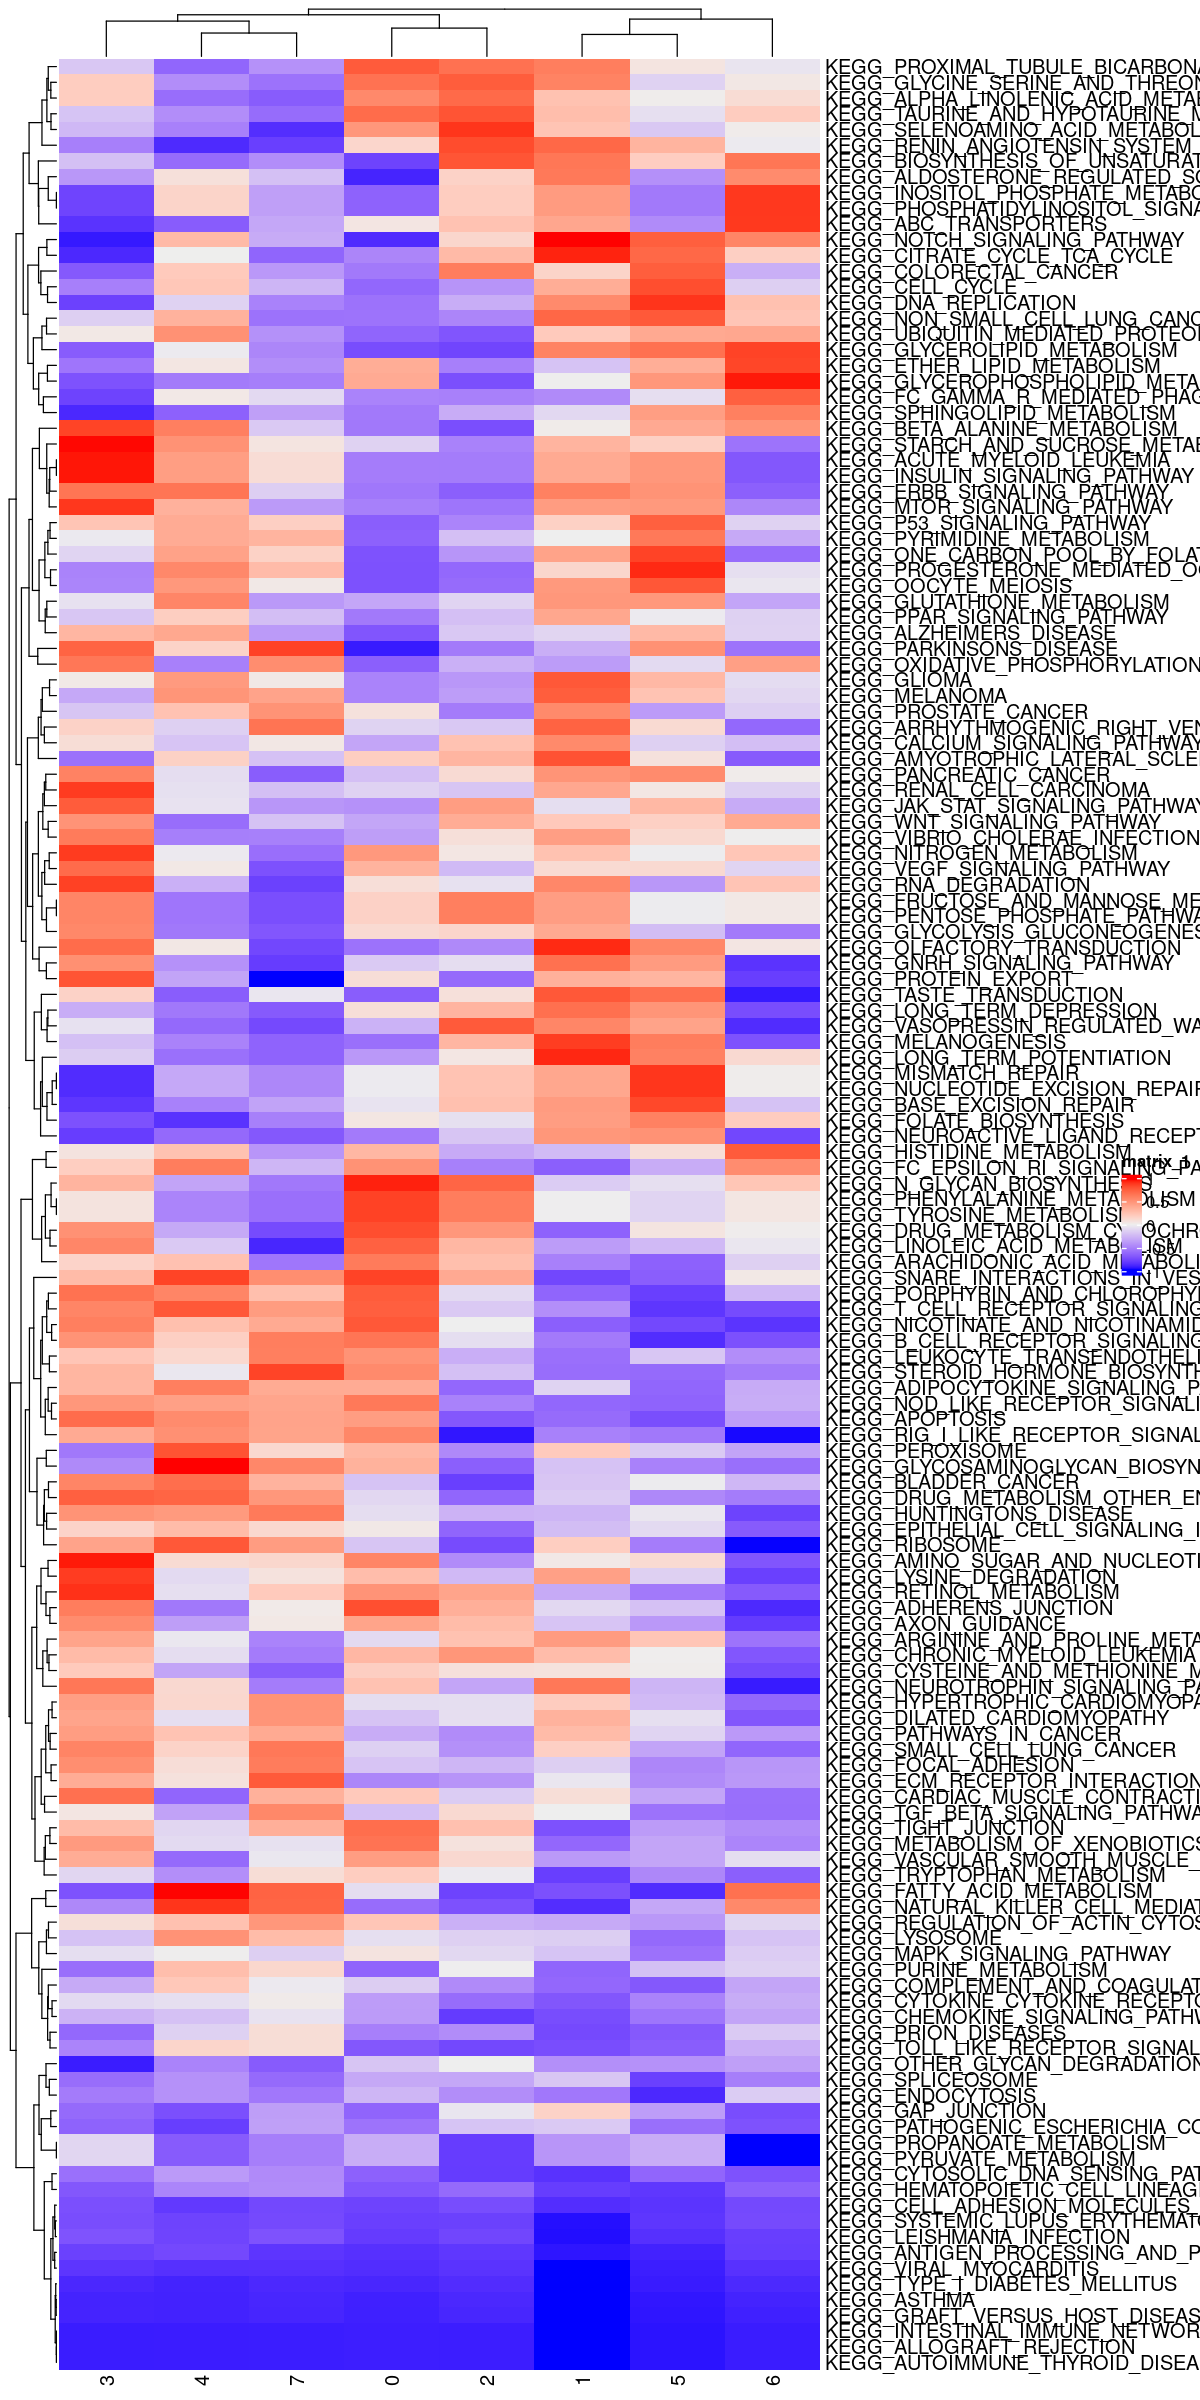

In [24]:
# enrichment analysis
require(msigdbr) # to load database
require(GSVA)
require(ComplexHeatmap)

kegg.dat <-  msigdbr(species = "Homo sapiens", category = "C2", subcategory = "CP:KEGG") 
kegg.genes <- split(kegg.dat$gene_symbol, kegg.dat$gs_name)
gsva.kegg.result <- gsva(expr=mat, gset.idx.list=kegg.genes, kcdf="Poisson", verbose=FALSE, parallel.sz = 16, mx.diff=1)
options(repr.plot.width=10, repr.plot.height=20) # change the size of figure
Heatmap(gsva.kegg.result)

#go.dat <- msigdbr(species = "Homo sapiens", category = "C5") %>% filter(gs_subcat != "HPO")
#go.genes <- split(go.dat$gene_symbol, go.dat$gs_name)

#gsva.go.result <- gsva(expr=mat, gset.idx.list=go.genes, kcdf="Poisson", verbose=FALSE, parallel.sz = 16, mx.diff=1)
#Heatmap(gsva.go.result)

# Section two, alternative expression analysis

In [17]:
# Load the exon expression file and add the exon-cell matrix to the Seurat object
exon <- ReadPISA("/course/bgi23/quan/exon/")
obj[['EXON']] <- CreateAssayObject(exon[, colnames(obj)], min.cells=30)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [18]:
rm(exon)
# A new EPT assay now created
names(obj)

[1] "RNA"     "EXON"    "RNA_nn"  "RNA_snn" "pca"     "umap"

In [19]:
# Check the meta data for features. Try to understand between meta.features and obj@meta.data
head(obj[['RNA']]@meta.features)

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
ENSG00000268903,0.006387509,0.007771671,0.006573427,1.1822861,FALSE
ENSG00000241860,0.006387509,0.006351216,0.006573427,0.9661957,FALSE
MTND1P23,0.017033357,0.016755113,0.019064023,0.8788865,FALSE
MTND2P28,0.251242016,0.280582618,0.339211620,0.8271610,FALSE
MTCO1P12,0.056068133,0.054382541,0.070978992,0.7661780,FALSE
MTCO2P12,0.036905607,0.035568827,0.044824793,0.7935079,FALSE


In [20]:
# set up the default assay to "EXON", let's move to exon analysis
DefaultAssay(obj) <- "EXON"

In [21]:
head(obj[['EXON']]@meta.features)

chr1:629640-630683/+/MTND2P28
chr1:631074-632616/+/MTCO1P12
chr1:632757-633438/+/MTCO2P12
chr1:633696-634376/+/MTATP6P1
chr1:634376-634922/+/MTCO3P12
chr1:785800-787672/+/LINC01409


In [22]:
obj <- ParseExonName(obj)

Working on assay EXON



In [23]:
# update exon annotation
head(obj[['EXON']]@meta.features)

,chr,start,end,strand,gene_name
,<chr>,<int>,<int>,<chr>,<chr>
chr1:629640-630683/+/MTND2P28,chr1,629640,630683,+,MTND2P28
chr1:631074-632616/+/MTCO1P12,chr1,631074,632616,+,MTCO1P12
chr1:632757-633438/+/MTCO2P12,chr1,632757,633438,+,MTCO2P12
chr1:633696-634376/+/MTATP6P1,chr1,633696,634376,+,MTATP6P1
chr1:634376-634922/+/MTCO3P12,chr1,634376,634922,+,MTCO3P12
chr1:785800-787672/+/LINC01409,chr1,785800,787672,+,LINC01409


In [24]:
# calculate the autocorrelation score (here use Moran's I) for all exon features
obj <- RunAutoCorr(obj, threads = 8)

Working on assay : EXON

Build weights on pca

Run autocorrelation test for 111291 features.



In [25]:
# select the spatial autocorrelated features for downstream analysis
obj <- SetAutoCorrFeatures(obj, moransi.min = 0.1)

22480 autocorrelated features.



In [26]:
# This step may take a while; depending on the feature number and cell number, the runtime may range from seconds to hours. 
# The default permutation step is 1000. It's probably too overwhelming. Here, we change perm to 100 to save time.
obj <- RunBlockCorr(obj, block.name = "gene_name", block.assay = "RNA", threads=8, perm=100)

Working on assay EXON

Working on 22480 features.

Build weights on pca

Processing 5077 blocks..

Trying to retrieve data from assay RNA..

Test dissimlarity of two processes ..

Runtime : 10.49869 secs



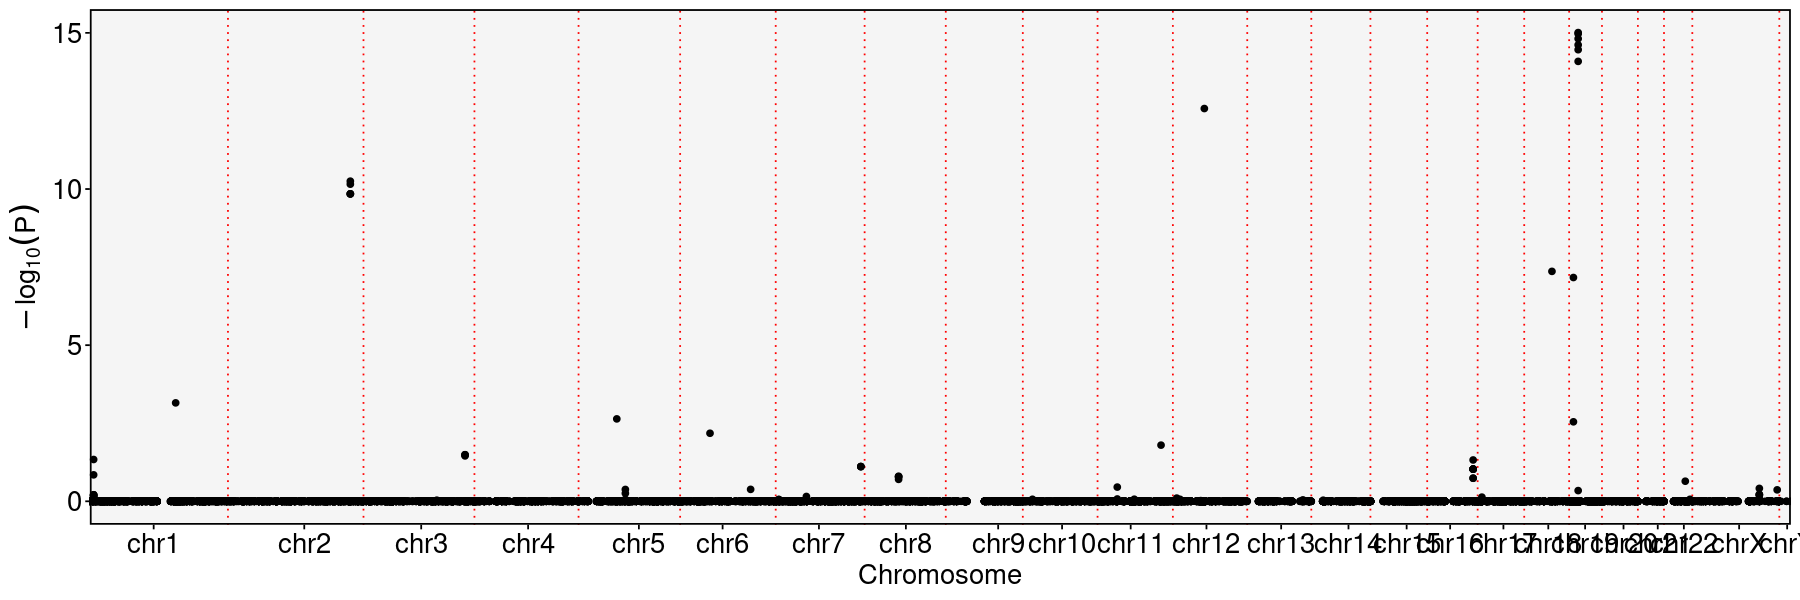

In [27]:
options(repr.plot.width=15, repr.plot.height=5) # change the size of figure
# Plot Genome wide feature binding test plot
FbtPlot(obj, val = "gene_name.pval")

In [29]:
obj[['EXON']]@meta.features %>% filter(gene_name.pval < 0.001) 

,chr,start,end,strand,gene_name,MoransI,MoransI.pval,AutoCorrFeature,gene_name.D,gene_name.r,gene_name.pval
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
chr1:154167742-154167940/-/TPM3,chr1,154167742,154167940,-,TPM3,0.2813710,4.166153e-144,TRUE,0.4462010,0.304039673,7.043557e-04
chr12:56161387-56161465/+/MYL6,chr12,56161387,56161465,+,MYL6,0.3246550,2.391199e-180,TRUE,0.6284589,-0.152109401,2.649379e-13
chr18:49481681-49482410/-/RPL17-C18orf32,chr18,49481681,49482410,-,RPL17-C18orf32,0.1932551,2.438328e-65,TRUE,0.5174144,0.038017236,4.337481e-08
chr19:7647354-7647477/+/ENSG00000268400,chr19,7647354,7647477,+,ENSG00000268400,0.3101388,7.299948e-177,TRUE,0.5246010,0.150447601,6.821943e-08
chr19:16095264-16095357/+/TPM4,chr19,16095264,16095357,+,TPM4,0.3285459,1.009382e-191,TRUE,0.6930864,-0.004861565,8.185904e-15
chr19:16095264-16095893/+/TPM4,chr19,16095264,16095893,+,TPM4,0.3554737,3.113092e-223,TRUE,0.6951940,0.020410822,3.464834e-15
chr19:16095264-16095591/+/TPM4,chr19,16095264,16095591,+,TPM4,0.3581245,1.295994e-226,TRUE,0.6988576,0.018555945,2.430256e-15
chr19:16095264-16095454/+/TPM4,chr19,16095264,16095454,+,TPM4,0.3604254,1.594554e-230,TRUE,0.7117643,0.007386382,1.072838e-15
chr19:16095264-16096744/+/TPM4,chr19,16095264,16096744,+,TPM4,0.3569537,6.664588e-225,TRUE,0.6964831,0.020906868,1.539954e-15


In [30]:
# Normalize Exon expression for featureplot
obj <- NormalizeData(obj)

Warning message:
“Could not find TPM4 in the default search locations, found in ‘RNA’ assay instead”


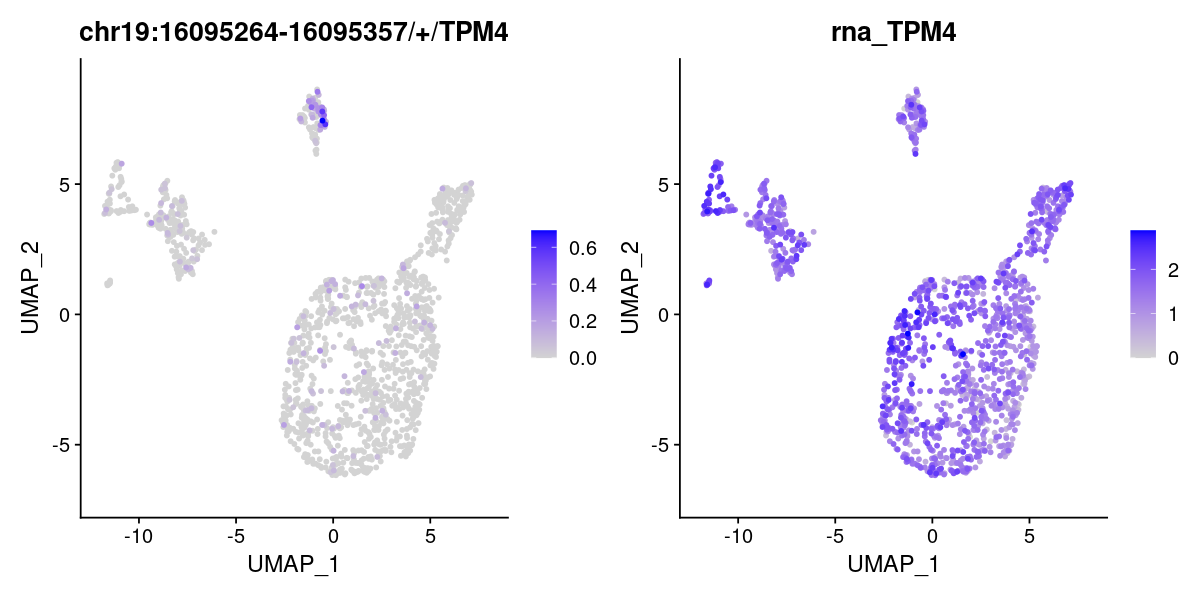

In [31]:
options(repr.plot.width=10, repr.plot.height=5) # change the size of figure
# random pick one exon and its related gene, compare them on all cells
# FeaturePlot(obj, features = c("chr11:123061588-123061833/-/HSPA8", "HSPA8"), order = TRUE, pt.size=1)
FeaturePlot(obj, features = c("chr19:16095264-16095357/+/TPM4", "TPM4"), order = TRUE, pt.size=1)

In [33]:
# Prepare GTF database for track plots 
db <- gtf2db("/course/bgi23/quan/gencode.v44.annotation.gtf.gz")

[2023-11-07 03:43:29] GTF loading..
[2023-11-07 03:44:20] Load 62700 genes.
[2023-11-07 03:44:20] Load time : 50.458 sec
Done!


Chromosome chr19, start 16066021, end 16104002

Process /course/bgi23/quan/Parent_SC3v3_Human_Glioblastoma_possorted_genome_bam.bam



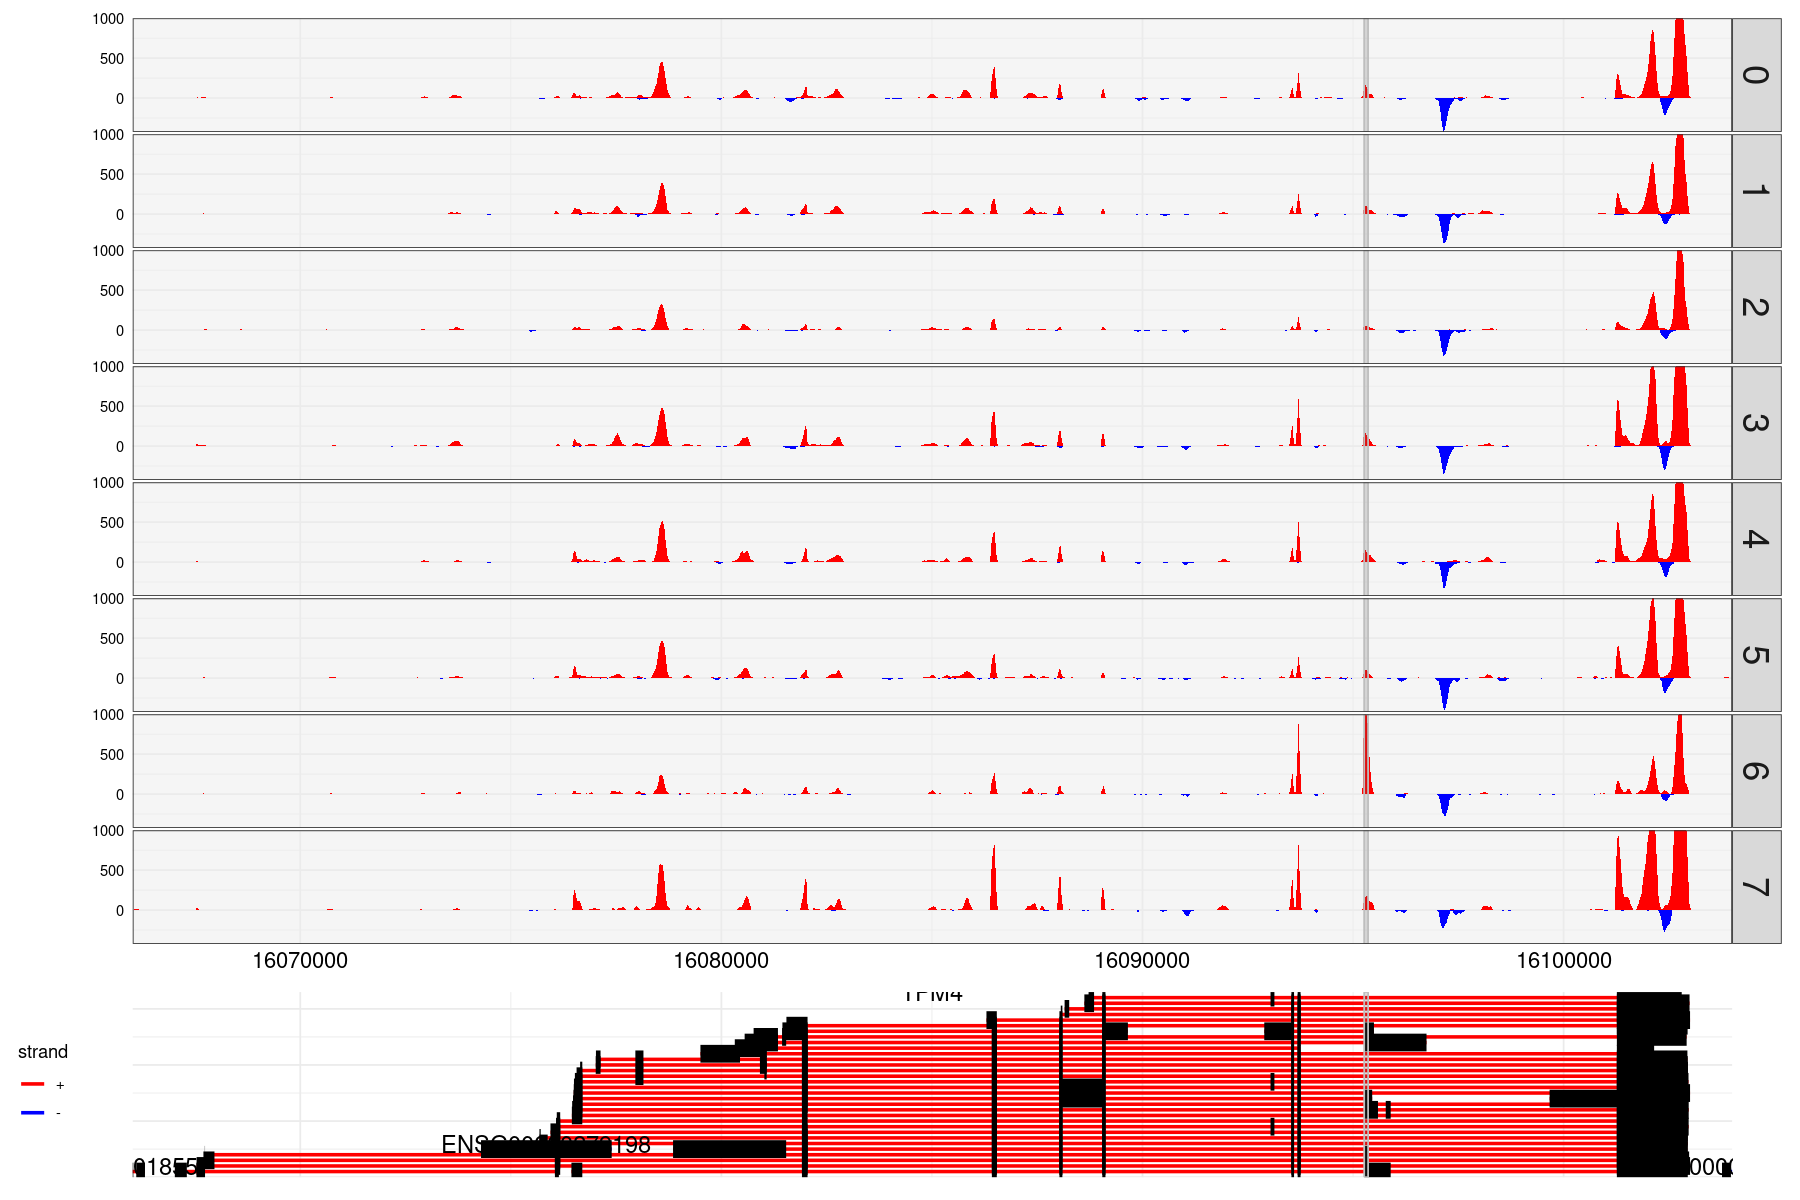

In [35]:
options(repr.plot.width=15, repr.plot.height=10) # change the size of figure
plotTracks(bamfile="/course/bgi23/quan/Parent_SC3v3_Human_Glioblastoma_possorted_genome_bam.bam", db=db, gene="TPM4",cell.group =  Idents(obj), max.depth=1000, highlight=c(16095264,16095357))